In [4]:
import tensorflow as tf
a=3    #create a variable.
w=tf.Variable([[0.5,1.0]])
x=tf.Variable([[2.0],[1.0]])
y=tf.matmul(w,x)
print(w)#w的大小和类型

init_op=tf.initialize_all_variables()#对全局变量进行初始化操作
with tf.Session() as sess:
    sess.run(init_op)
    print(y.eval())

<tf.Variable 'Variable_6:0' shape=(1, 2) dtype=float32_ref>
Instructions for updating:
Use `tf.global_variables_initializer` instead.
[[ 2.]]


In [5]:
tf.zeros([3,4],int32)==>[[0,0,0,0],[0,0,0,0],[0,0,0,0]
#'tensor' is[[1,2,3],[4,5,6]]
tf.zeros_like(tensor)==>[[0,0,0],[0,0,0]]
tf.ones([2,3],int32)==>[[1,1,1],[1,1,1]]
tensor=tf.constant([1,2,3,4,5,6,7])==>[1 2 3 4 5 6 7]
tensor=tf.constant(-1.0,shape=[2,3])=>2 rows 3 columns
tf.linspace(10.0,12.0,3,name="linespace")=>3个数
tf.range(start,limit,delta)=>[3,6,9,12,15]=>不包含结束的18
norm=tf.random_normal([2,3],mean=-1,stddev=4)
c=tf.constant([[1,2],[3,4],[5,6]])
shuff=tf.random_shuffle(c)=>错
sess=tf.sesssion()
#(or with tf.session()as sess)
print(sess.run(norm))
print(sess.run(shuff))
                         
    




SyntaxError: invalid syntax (<ipython-input-5-488c48d7f19f>, line 1)

In [6]:
state=tf.Variable(0)
new_value=tf.add(state,tf.constant(1))
update=tf.assign(state,new_value)
with tf.Session() as sess:
    sess.run(tf.initialize_all_variables())
    print(sess.run(state))
    for _ in range(3):
        sess.run(update)
        print(sess.run(state))

Instructions for updating:
Use `tf.global_variables_initializer` instead.
0
1
2
3


In [7]:
w=tf.Variable([[0.5,1.0]])
x=tf.Variable([[2.0],[1.0]])
y=tf.multiply(w,x)
init_op=tf.initialize_all_variables()
saver=tf.train.Saver()
with tf.Session() as sess:
    sess.run(init_op)
    save_path=saver.save(sess,'C://tensorflow//model//test')
    print('Model saved in file:',save_path)

Instructions for updating:
Use `tf.global_variables_initializer` instead.


ValueError: Parent directory of C://tensorflow//model//test doesn't exist, can't save.

In [8]:
import tensorflow as tf
norm=tf.random_normal([2,3],mean=-1,stddev=4)
c=tf.constant([[1,2],[3,4],[5,6]])
shuff=tf.random_shuffle(c)
with tf.Session()as sess:
    print(sess.run(norm))
    print(sess.run(shuff))
    


[[ 7.32346535  3.16931343  0.48967838]
 [-2.96955681  1.10315084 -2.00524998]]
[[5 6]
 [1 2]
 [3 4]]


In [9]:
import numpy as np
a=np.zeros((3,3))
ta=tf.convert_to_tensor(a)
with tf.Session() as sess:
    print (sess.run(ta))

[[ 0.  0.  0.]
 [ 0.  0.  0.]
 [ 0.  0.  0.]]


In [27]:
input1=tf.placeholder(tf.float32)
input2=tf.placeholder(tf.float32)
output=tf.multiply(input1,input2)#mul已弃用
with tf.Session() as sess:
    print (sess.run([output],feed_dict={input1:[7.],input2:[2.]}))

[array([ 14.], dtype=float32)]


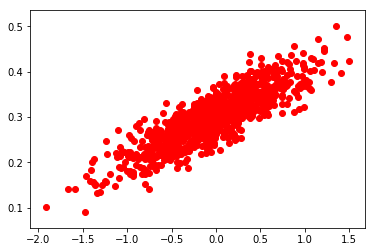

In [29]:
#线性回归模型
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
num_points=1000
vectors_set=[]
for i in range(num_points):
    x1=np.random.normal(0.0,0.55)
    y1=x1*0.1+0.3+np.random.normal(0.0,0.03)#均值与标准差
    vectors_set.append([x1,y1])
x_data=[v[0] for v in vectors_set]
y_data=[v[1] for v in vectors_set]
plt.scatter(x_data,y_data,c='r')
plt.show()

In [43]:
W=tf.Variable(tf.random_uniform([1],-1.0,1.0),name='W')
b=tf.Variable(tf.zeros([1]),name='b')
#经过计算得出预估值y
y=W*x_data+b
#以预估值和实际值的均方误差作为损失
loss=tf.reduce_mean(tf.square(y-y_data),name='loss')
#采用梯度下降法来优化参数
optimizer=tf.train.GradientDescentOptimizer(0.5)
#训练过程就是最小化误差值
train=optimizer.minimize(loss,name='train')
sess=tf.Session()
init=tf.initialize_all_variables()
sess.run(init)
print('W=',sess.run(W),'b=',sess.run(b),'loss=',sess.run(loss))
for step in range(20):
    sess.run(train)
print('W=',sess.run(W),'b=',sess.run(b),'loss=',sess.run(loss))

Instructions for updating:
Use `tf.global_variables_initializer` instead.
W= [ 0.23057556] b= [ 0.] loss= 0.0994333
W= [ 0.09902183] b= [ 0.30205053] loss= 0.000893607


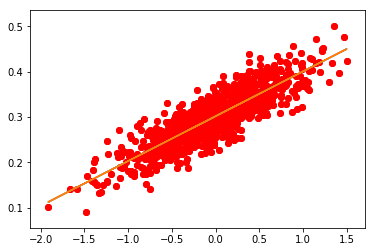

In [45]:
plt.scatter(x_data,y_data,c='r')
plt.plot(x_data,sess.run(W)*x_data+sess.run(b))
plt.show()

In [ ]:
#逻辑回归框架
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
import input_data

In [ ]:
mnist=input_data.read_data_sets('data/',one_hot=True)
trainimg=mnist.train.images
trainlabel=mbist.train.labels
testimg=mnist.test.images
testlabel=mnist.test.labels


In [ ]:
print (trainimg.shape)
print (trainlabel.shape)
print(testimg.shape)
print(testlabel.shape)
#print (trainimg)
#print(trainlabel[0])


In [19]:
x=tf.placeholder('float',[None,784])
y=tf.placeholder('float',[None,10])
W=tf.Variable(tf.zeros([784,10]))
b=tf.Variable(tf.zeros([10]))
#logistic回归模型
actv=tf.nn.softmax(tf.matmul(x,W)+b)
cost=tf.reduce_mean(-tf.reduce_sum(y*tf.log(actv),reduction_indices=1))
learning_rate=0.01
optm=tf.train.GradientDescentOptimizer(learning_rate).minimize(cost)

In [20]:
pred=tf.equal(tf.argmax(actv,1),tf.argmax(y,1))#比较索引值，返回true 或者 false
accr=tf.reduce_mean(tf.cast(pred,'float'))#转换成 0，1
init=tf.initialize_all_variables()

Instructions for updating:
Use `tf.global_variables_initializer` instead.


In [21]:
sess=tf.InteractiveSession()
arr=np.array([[31,23,4,24,27,34],
              [18,3,25,0,6,35],
              [28,14,33,22,20,8],
              [13,30,21,19,7,9],
              [16,1,26,32,2,29],
              [17,12,5,11,10,15]])
tf.rank(arr).eval()#打印东西要加上eval,查看维度
tf.shape(arr).eval()
tf.argmax(arr,0).eval()#每一列上最大值的索引

array([0, 3, 2, 4, 0, 1], dtype=int64)

In [22]:
training_epochs=50#迭代50次
batch_size=100#每次迭代要选择多少样本
display_step=5
mnist=input_data.read_data_sets('data/',one_hot=True)
#SESSION
sess=tf.Session()
init=tf.initialize_all_variables()
sess.run(init)
optm=tf.train.GradientDescentOptimizer(learning_rate).minimize(cost)
for epoch in range(training_epochs):
    avg_cost=0.
    num_batch=int(mnist.train.num_examples/batch_size)
    for i in range(num_batch):
        batch_xs,batch_ys=mnist.train.next_batch(batch_size)
        sess.run(optm,feed_dict={x:batch_xs,y:batch_ys})
        feeds={x:batch_xs,y:batch_ys}
        avg_cost+=sess.run(cost,feed_dict=feeds)/num_batch
        #DISPLAY
        if epoch % display_step==0:#每5个epoch打印一次
            feeds_train={x:batch_xs,y:batch_ys}
            feeds_test={x:mnist.test.images,y:mnist.test.labels}
            train_acc=sess.run(accr,feed_dict=feeds_train)
            test_acc=sess.run(accr,feed_dict=feeds_test)
            print('Epoch:%03d/%03d cost:.9f train_acc:%.3f'%(epoch,training_epochs,avg_cost,train_acc,test_acc))
print('DONE')

Extracting data/train-images-idx3-ubyte.gz
Extracting data/train-labels-idx1-ubyte.gz
Extracting data/t10k-images-idx3-ubyte.gz
Extracting data/t10k-labels-idx1-ubyte.gz
Instructions for updating:
Use `tf.global_variables_initializer` instead.
ERROR:tensorflow:==================================
Object was never used (type <class 'tensorflow.python.framework.ops.Operation'>):
<tf.Operation 'init_4' type=NoOp>
If you want to mark it as used call its "mark_used()" method.
It was originally created here:
['File "C:\\Users\\lichen\\Anaconda3\\lib\\runpy.py", line 193, in _run_module_as_main\n    "__main__", mod_spec)', 'File "C:\\Users\\lichen\\Anaconda3\\lib\\runpy.py", line 85, in _run_code\n    exec(code, run_globals)', 'File "C:\\Users\\lichen\\Anaconda3\\lib\\site-packages\\ipykernel_launcher.py", line 16, in <module>\n    app.launch_new_instance()', 'File "C:\\Users\\lichen\\Anaconda3\\lib\\site-packages\\traitlets\\config\\application.py", line 658, in launch_instance\n    app.start(

TypeError: not all arguments converted during string formatting

In [23]:
#神经网络模型
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
import input_data

In [11]:
mnist=input_data.read_data_sets('data/',one_hot=True)

Extracting data/train-images-idx3-ubyte.gz
Extracting data/train-labels-idx1-ubyte.gz
Extracting data/t10k-images-idx3-ubyte.gz
Extracting data/t10k-labels-idx1-ubyte.gz


In [28]:
n_hidden_1=256
n_hidden_2=128
n_input=784#像素点
n_classes=10
#INPUTS AND OUTPUTS
x=tf.placeholder('float',[None,None])
y=tf.placeholder('float',[None,None])#这里注意，占位符无需指定大小
#NETWORK PARAMETERS
stddev=0.1
weights={
    'w1':tf.Variable(tf.random_normal([n_input,n_hidden_1],stddev=stddev)),
    'w2':tf.Variable(tf.random_normal([n_hidden_1,n_hidden_2],stddev=stddev)),
    'out':tf.Variable(tf.random_normal([n_hidden_2,n_classes],stddev=stddev))
}
biases={
    'b1':tf.Variable(tf.random_normal([n_hidden_1])),
    'b2':tf.Variable(tf.random_normal([n_hidden_2])),
    'out':tf.Variable(tf.random_normal([n_classes]))
}
print("NETWORK READY")

NETWORK READY


In [30]:
#前向传播
def multilayer_perceptron(_X,_weights,_biases):
    layer_1=tf.nn.sigmoid(tf.add(tf.matmul(_X,_weights['w1']),_biases['b1']))
    layer_2=tf.nn.sigmoid(tf.add(tf.matmul(layer_1,_weights['w2']),_biases['b2']))
    return (tf.matmul(layer_2,_weights['out'])+_biases['out'])

In [32]:
#PRESICTION
pred=multilayer_perceptron(x,weights,biases)
#LOSS AND OPTIMIZER
cost=tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(logits=pred,labels=y))#这里注意
optm=tf.train.GradientDescentOptimizer(learning_rate=0.001).minimize(cost)
corr=tf.equal(tf.argmax(pred,1),tf.argmax(y,1))
accr=tf.reduce_mean(tf.cast(corr,'float'))
#INITIALIZER
init=tf.global_variables_initializer()
print ("FUNCTION READY")

FUNCTION READY


In [39]:
training_epochs=20
batch_size=100
display_step=4
#LAUNCH THE GRAPH
sess=tf.Session()
init=tf.global_variables_initializer()
sess.run(init)
#OPTIMIZE
for epoch in range(training_epochs):
    avg_cost=0.
    total_batch=int(mnist.train.num_examples/batch_size)
    #ITERATION
    for i in range(total_batch):
        batch_xs,batch_ys=mnist.train.next_batch(batch_size)
        feeds={x:batch_xs,y:batch_ys}
        sess.run(optm,feed_dict=feeds)
        avg_cost+=sess.run(cost,feed_dict=feeds)
    avg_cost=avg_cost/total_batch
    #DISPLAY
    if (epoch+1) %display_step==0:
        print("Epoch:%03d/%03d cost:%.9f"%(epoch,training_epochs,avg_cost))
        feeds={x:batch_xs,y:batch_ys}
        train_acc=sess.run(accr,feed_dict=feeds)
        print("TRAIN ACCURACY:%.3f"%(train_acc))
        feeds={x:batch_xs,y:batch_ys}
        test_acc=sess.run(accr,feed_dict=feeds)
        print("TEST ACCURACY:%.3f"%(test_acc))       
print("OPTIMIZATION FINISHED")

Epoch:003/020 cost:2.262452568
TRAIN ACCURACY:0.210
TEST ACCURACY:0.210
Epoch:007/020 cost:2.226059791
TRAIN ACCURACY:0.400
TEST ACCURACY:0.400
Epoch:011/020 cost:2.185573780
TRAIN ACCURACY:0.460
TEST ACCURACY:0.460
Epoch:015/020 cost:2.138464073
TRAIN ACCURACY:0.500
TEST ACCURACY:0.500
Epoch:019/020 cost:2.082527692
TRAIN ACCURACY:0.560
TEST ACCURACY:0.560
OPTIMIZATION FINISHED


In [41]:
#卷积神经网络
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
import input_data
mnist=input_data.read_data_sets('data/',one_hot=True)
trainimg=mnist.train.images
trainlabel=mnist.train.labels
testimg=mnist.test.images
testlabel=mnist.test.labels
print ("MNIST ready")


Extracting data/train-images-idx3-ubyte.gz
Extracting data/train-labels-idx1-ubyte.gz
Extracting data/t10k-images-idx3-ubyte.gz
Extracting data/t10k-labels-idx1-ubyte.gz
MNIST ready


In [42]:
n_input=784
n_output=10
weights={
    'wc1':tf.Variable(tf.random_normal([3,3,1,64],stddev=0.1)),#w,h,深度，特征图
    'wc2':tf.Variable(tf.random_normal([3,3,64,128],stddev=0.1)),
    'wd1':tf.Variable(tf.random_normal([7*7*128,1024],stddev=0.1)),
    'wd2':tf.Variable(tf.random_normal([1024,n_output],stddev=0.1))
}
biases={
    'bc1':tf.Variable(tf.random_normal([64],stddev=0.1)),
    'bc2':tf.Variable(tf.random_normal([128],stddev=0.1)),
    'bd1':tf.Variable(tf.random_normal([1024],stddev=0.1)),
    'bd2':tf.Variable(tf.random_normal([n_output],stddev=0.1))
}

In [51]:
def conv_basic(_input,_w,_b,_keepratio):
    #INPUT
    _input_r=tf.reshape(_input,shape=[-1,28,28,1])#n,h,w,深度，-1表示让tensorflow自动推断
    #CONV LAYER 1
    _conv1=tf.nn.conv2d(_input_r,_w['wc1'],strides=[1,1,1,1],padding='SAME')#SAME进行0值填充
    #mean,_var=tf.nn.moments(_conv1,[0,1,2])
    #_conv1=tf.nn.batch_normalization(_conv1,_mean,_var,0,1,0.0001)
    _conv1=tf.nn.relu(tf.nn.bias_add(conv1,_b['bc1']))
    _pool1=tf.nn.max_pool(_conv1,ksize=[1,2,2,1],strides=[1,2,2,1],padding='SAME')
    _pool_dr1=tf.nn.dropout(_pool1,_keepratio)#随机杀死一些节点
    #CONV LAYER 2
    _conv2=tf.nn.conv2d(_pool_dr1,_w['wc2'],strides=[1,1,1,1],padding='SAME')
    #mean,_var=tf.nn.moments(_conv2,[0,1,2])
    ##_conv2=tf.nn.batch_normalization(_conv2,_mean,_var,0,1,0.0001)
    _conv2=tf.nn.relu(tf.nn.bias_add(conv2,_b['bc2']))
    _pool2=tf.nn.max_pool(_conv2,ksize=[1,2,2,1],strides=[1,2,2,1],padding='SAME')
    _pool_dr2=tf.nn.dropout(_pool2,_keepratio)
    #VECTORIZE
    _dense1=tf.reshape(_pool_dr2,[-1,_w['wd1'].get_shape().as_list()[0]])
    #FULLY CONNECTED LAYER 1
    _fc1=tf.nn.relu(tf.add(tf.matmul(_dense1,_w['wd1']),_b['bd1']))
    _fc_dr1=tf.nn.dropout(_fc1,_keepratio)
    #FULLY CONNECTED LAYER 2
    _out=tf.add(tf.matmul(_fc_dr1,_w['wd2']),_b['bd2'])
    #RETURN
    out={'input_r':_input_r,'conv1':_conv1,'pool1':_pool1,'pool1_dr1':_pool_dr1,'conv2':_conv2,'pool2':_pool2,'pool_dr2':_pool_dr2,
        'dense1':dense1,'fc1':_fc1,'fc_dr1':_fc_dr1,'out':_out
    }
    return out
print("CNN READY")

CNN READY


In [52]:
a=tf.Variable(tf.random_normal([3,3,1,64],stddev=0.1))
print (a)
a=tf.Print(a,[a],"a:")
init=tf.global_variables_initializer()
sess=tf.Session()
sess.run(init)
#sess.run(a)

<tf.Variable 'Variable_40:0' shape=(3, 3, 1, 64) dtype=float32_ref>


In [ ]:
#print (help(tf.nn.conv2d))
#print (help(tf.nn.max_pool))

In [53]:
x=tf.placeholder(tf.float32,[None,None])
y=tf.placeholder(tf.float32,[None,None])
keepratio=tf.placeholder(tf.float32)
#FUNCTIONS
_pred=conv_basic(x,weights,biases,keepratio)['out']
cost=tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(logits=_pred,labels=y))#这里注意
optm=tf.train.AdamOptimizer(learning_rate=0.001).minimize(cost)
_corr=tf.equal(tf.argmax(pred,1),tf.argmax(y,1))
accr=tf.reduce_mean(tf.cast(corr,tf.float32))
init=tf.global_variables_initializer()
#SAVER
print ("GRAPH READY")


NameError: name 'conv1' is not defined

In [56]:
sess=tf.Session()
sess.run(init)

training_epochs=15
batch_size=16
display_step=1
for epoch in range(training_epochs):
    avg_cost=0.
    #total_batch=int(mnist.train.num_examples/batch_size)
    total_batch=10
    for i in range(total_batch):
        batch_xs,batch_ys=mnist.train.next_batch(batch_size)
        #Fit training using batch data
        sess.run(optm,feed_dict={x:batch_xs,y:batch_ys,keepratio:0.7})
        #Compute average loss
        feeds={x:batch_xs,y:batch_ys}
        avg_cost+=sess.run(cost,feed_dict={x:batch_xs,y:batch_ys,keepratio:1.})/total_batch
        #DISPLAY
        if epoch % display_step==0:#每5个epoch打印一次
            print('Epoch:%03d/%03d cost:.9f'%(epoch,training_epochs,avg_cost))
            train_acc=sess.run(accr,feed_dict={x:batch_xs,y:batch_ys,keepratio:1.})
            print('Traininig accuracy:%.3f'%(train_acc))
            #test_acc=sess.run(accr,feed_dict={x:batch_xs,y:batch_ys,keepratio:1.})
            print('Test accuracy:%.3f'%(test_acc))
print('OPTIMIZATION FINISHED')

InvalidArgumentError: Shape [-1,-1] has negative dimensions
	 [[Node: Placeholder_8 = Placeholder[dtype=DT_FLOAT, shape=[?,?], _device="/job:localhost/replica:0/task:0/cpu:0"]()]]

Caused by op 'Placeholder_8', defined at:
  File "C:\Users\lichen\Anaconda3\lib\runpy.py", line 193, in _run_module_as_main
    "__main__", mod_spec)
  File "C:\Users\lichen\Anaconda3\lib\runpy.py", line 85, in _run_code
    exec(code, run_globals)
  File "C:\Users\lichen\Anaconda3\lib\site-packages\ipykernel_launcher.py", line 16, in <module>
    app.launch_new_instance()
  File "C:\Users\lichen\Anaconda3\lib\site-packages\traitlets\config\application.py", line 658, in launch_instance
    app.start()
  File "C:\Users\lichen\Anaconda3\lib\site-packages\ipykernel\kernelapp.py", line 477, in start
    ioloop.IOLoop.instance().start()
  File "C:\Users\lichen\Anaconda3\lib\site-packages\zmq\eventloop\ioloop.py", line 177, in start
    super(ZMQIOLoop, self).start()
  File "C:\Users\lichen\Anaconda3\lib\site-packages\tornado\ioloop.py", line 888, in start
    handler_func(fd_obj, events)
  File "C:\Users\lichen\Anaconda3\lib\site-packages\tornado\stack_context.py", line 277, in null_wrapper
    return fn(*args, **kwargs)
  File "C:\Users\lichen\Anaconda3\lib\site-packages\zmq\eventloop\zmqstream.py", line 440, in _handle_events
    self._handle_recv()
  File "C:\Users\lichen\Anaconda3\lib\site-packages\zmq\eventloop\zmqstream.py", line 472, in _handle_recv
    self._run_callback(callback, msg)
  File "C:\Users\lichen\Anaconda3\lib\site-packages\zmq\eventloop\zmqstream.py", line 414, in _run_callback
    callback(*args, **kwargs)
  File "C:\Users\lichen\Anaconda3\lib\site-packages\tornado\stack_context.py", line 277, in null_wrapper
    return fn(*args, **kwargs)
  File "C:\Users\lichen\Anaconda3\lib\site-packages\ipykernel\kernelbase.py", line 283, in dispatcher
    return self.dispatch_shell(stream, msg)
  File "C:\Users\lichen\Anaconda3\lib\site-packages\ipykernel\kernelbase.py", line 235, in dispatch_shell
    handler(stream, idents, msg)
  File "C:\Users\lichen\Anaconda3\lib\site-packages\ipykernel\kernelbase.py", line 399, in execute_request
    user_expressions, allow_stdin)
  File "C:\Users\lichen\Anaconda3\lib\site-packages\ipykernel\ipkernel.py", line 196, in do_execute
    res = shell.run_cell(code, store_history=store_history, silent=silent)
  File "C:\Users\lichen\Anaconda3\lib\site-packages\ipykernel\zmqshell.py", line 533, in run_cell
    return super(ZMQInteractiveShell, self).run_cell(*args, **kwargs)
  File "C:\Users\lichen\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py", line 2698, in run_cell
    interactivity=interactivity, compiler=compiler, result=result)
  File "C:\Users\lichen\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py", line 2802, in run_ast_nodes
    if self.run_code(code, result):
  File "C:\Users\lichen\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py", line 2862, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "<ipython-input-28-9fc98b973aec>", line 6, in <module>
    x=tf.placeholder('float',[None,None])
  File "C:\Users\lichen\Anaconda3\lib\site-packages\tensorflow\python\ops\array_ops.py", line 1530, in placeholder
    return gen_array_ops._placeholder(dtype=dtype, shape=shape, name=name)
  File "C:\Users\lichen\Anaconda3\lib\site-packages\tensorflow\python\ops\gen_array_ops.py", line 1954, in _placeholder
    name=name)
  File "C:\Users\lichen\Anaconda3\lib\site-packages\tensorflow\python\framework\op_def_library.py", line 767, in apply_op
    op_def=op_def)
  File "C:\Users\lichen\Anaconda3\lib\site-packages\tensorflow\python\framework\ops.py", line 2506, in create_op
    original_op=self._default_original_op, op_def=op_def)
  File "C:\Users\lichen\Anaconda3\lib\site-packages\tensorflow\python\framework\ops.py", line 1269, in __init__
    self._traceback = _extract_stack()

InvalidArgumentError (see above for traceback): Shape [-1,-1] has negative dimensions
	 [[Node: Placeholder_8 = Placeholder[dtype=DT_FLOAT, shape=[?,?], _device="/job:localhost/replica:0/task:0/cpu:0"]()]]
